In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [128]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

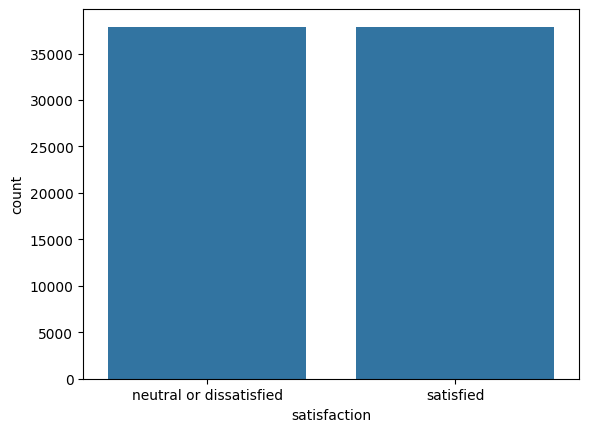

In [129]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [130]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,35,1199,0
75774,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,53,2556,3
75775,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,44,2842,0
75776,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,40,578,0


In [131]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75773    neutral or dissatisfied
75774    neutral or dissatisfied
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
Name: satisfaction, Length: 75778, dtype: object

In [132]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53044, 80) and test set is :(22734, 80)


In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17652737,  2.44792858, -0.49304411, ..., -1.42906388,
         0.7498532 , -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ...,  0.17710925,
        -1.2113492 , -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ..., -0.28179736,
        -1.00327581, -0.3898812 ],
       ...,
       [-0.17652737,  2.44792858, -0.49304411, ..., -0.74070397,
        -0.92978606,  0.60418601],
       [-0.17652737,  2.44792858, -0.49304411, ..., -1.35257945,
         0.81803044, -0.5318908 ],
       [-0.17652737, -0.40850865, -0.49304411, ..., -0.51125066,
        -0.64468124, -0.5318908 ]])

## Set paramiter CV

In [134]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## K-NN(K Nearest Neighbours)

In [135]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.048604 วินาที


In [136]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 97.12 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.98      0.97     11355
              satisfied       0.98      0.97      0.97     11379

               accuracy                           0.97     22734
              macro avg       0.97      0.97      0.97     22734
           weighted avg       0.97      0.97      0.97     22734



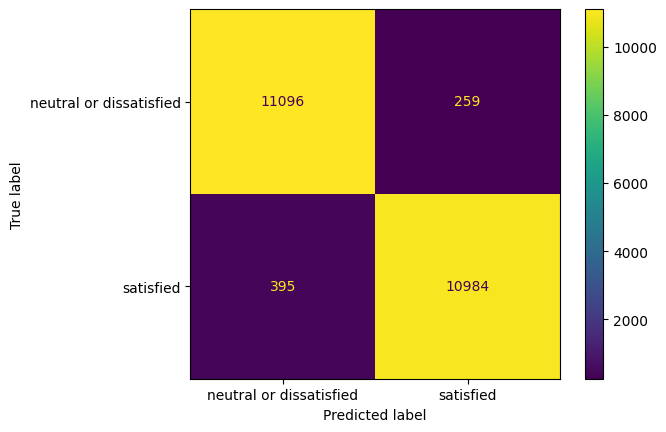

In [137]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_knn.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

In [138]:
# ทำ Cross Validation
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (KNN): {cv_scores_knn}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_knn):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_knn):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_KNN = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_KNN:.6f} วินาที")


Cross Validation Scores (KNN): [0.9689002  0.97172745 0.96974837 0.97370653 0.96973982 0.97624434
 0.97426471 0.97171946 0.96776018 0.97256787 0.9736991  0.97228507
 0.97143665 0.96493213 0.96719457]
Mean CV Accuracy: 0.9711
Standard Deviation CV Accuracy: 0.0029
เวลาที่ใช้ในการทำ Cross Validation: 4.453262 วินาที


In [139]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_knn.predict(X_train))
test_accuracy = accuracy_score(y_test, model_knn.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 0.9795075786139809
Test Accuracy: 0.971232515175508


In [140]:
import pickle
pickle_out = open("../../pipelines/model_KNN_business.pkl", mode = "wb")
pickle.dump(model_knn, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [141]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
11062,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,33,2967,0,satisfied
20549,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,60,3647,0,satisfied
4802,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,39,2227,11,satisfied
57702,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,34,2835,0,neutral or dissatisfied
22998,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,42,1431,17,satisfied
2285,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,64,814,0,satisfied
72619,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,51,1597,0,neutral or dissatisfied
58206,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,26,580,22,neutral or dissatisfied
61788,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,42,760,0,neutral or dissatisfied
11208,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,41,1773,0,satisfied


In [142]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
11062,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,33,2967,0
20549,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,60,3647,0
4802,0,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,39,2227,11
57702,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,34,2835,0
22998,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,42,1431,17
2285,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,64,814,0
72619,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,51,1597,0
58206,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,26,580,22
61788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,42,760,0
11208,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,41,1773,0


In [143]:
y_sam = df_sam.iloc[:,-1]
y_sam


11062                  satisfied
20549                  satisfied
4802                   satisfied
57702    neutral or dissatisfied
22998                  satisfied
2285                   satisfied
72619    neutral or dissatisfied
58206    neutral or dissatisfied
61788    neutral or dissatisfied
11208                  satisfied
40238                  satisfied
21347                  satisfied
2765                   satisfied
2729                   satisfied
52369                  satisfied
37496                  satisfied
10391                  satisfied
33616                  satisfied
75362    neutral or dissatisfied
57457    neutral or dissatisfied
Name: satisfaction, dtype: object

In [144]:
model = pickle.load(open("../../pipelines/model_KNN_business.pkl", 'rb'))
scaler_1 = pickle.load(open("../../pipelines/scaler.pkl", 'rb'))

scaler_new = scaler_1.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_KNN=accuracy_score(preds,y_sam)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

['satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'satisfied' 'satisfied' 'satisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied']
Accuracy of Knn is : 100.0 % .
